In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.decomposition import PCA
from scipy.stats import entropy

In [30]:
def run_all_models(X_train_scaled, X_test_scaled, y_train_encoded, y_test_encoded):
    models = {
        "LogisticRegression": LogisticRegression(),
        "SVC": SVC(),
        "DecisionTreeClassifier": DecisionTreeClassifier(random_state=42),
        "RandomForestClassifier": RandomForestClassifier(random_state=42),
        "KNeighborsClassifier": KNeighborsClassifier(),
        "GradientBoostingClassifier": GradientBoostingClassifier(random_state=42),
        "GaussianNB": GaussianNB(),
    }

    # Create an empty DataFrame to store accuracy
    model_performance = []

    for name, model in models.items():
        model.fit(X_train_scaled, y_train_encoded)
        predictions = model.predict(X_test_scaled)
        accuracy = accuracy_score(y_test_encoded, predictions)
        print(f"{name} Accuracy:", accuracy)
        model_performance.append({"Model": name, "Accuracy": accuracy})

    # For the Sequential model
    sequential_model = Sequential()
    sequential_model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
    sequential_model.add(Dense(32, activation='relu'))
    sequential_model.add(Dense(1, activation='sigmoid'))
    sequential_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    sequential_model.fit(X_train_scaled, y_train_encoded, epochs=50, batch_size=10, verbose=0)
    loss, accuracy = sequential_model.evaluate(X_test_scaled, y_test_encoded)
    print(f"Sequential Model Accuracy: {accuracy}")
    print(f"Sequential Model Loss: {loss}")
    model_performance.append({"Model": "Sequential", "Accuracy": accuracy})

    return pd.DataFrame(model_performance)

def automate_pca(pca_components, X_train_scaled, X_test_scaled, y_train_encoded, y_test_encoded):
  pca = PCA(n_components=pca_components)
  X_train_pca = pca.fit_transform(X_train_scaled)
  X_test_pca = pca.transform(X_test_scaled)
  
  models = run_all_models(X_train_pca, X_test_pca, y_train_encoded, y_test_encoded)
  print(models)
  
def labels_to_probabilities(y):
    values, counts = np.unique(y, return_counts=True)
    probabilities = counts / counts.sum()
    return probabilities

def calculate_entropy(df:pd.DataFrame)-> pd.DataFrame:
  """_summary_

  Args:
      df (pd.DataFrame): _description_

  Returns:
      pd.DataFrame: _description_
  """

  column_entropy_info = {}
  for col in df.columns:
    probabilities = labels_to_probabilities(df[col])
    entropy_value = entropy(probabilities, base=2)
    column_entropy_info[col] = {
          'entropy': entropy_value
      }

  return pd.DataFrame(column_entropy_info)

In [31]:
df = pd.read_csv("exams.csv")
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86
...,...,...,...,...,...,...,...,...
995,male,group C,some college,standard,none,77,77,71
996,male,group C,some college,standard,none,80,66,66
997,female,group A,high school,standard,completed,67,86,86
998,male,group E,high school,standard,none,80,72,62


In [32]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [33]:
df.duplicated().sum()

0

In [34]:
for col in df.columns:
  number_values = df[col].nunique()
  unique_values = df[col].unique()
  print("---------------------------")
  print(f"Col is {col}")
  print(f"Number of values: {number_values}")
  print(f"Number of values: {unique_values}")

---------------------------
Col is gender
Number of values: 2
Number of values: ['female' 'male']
---------------------------
Col is race/ethnicity
Number of values: 5
Number of values: ['group D' 'group B' 'group C' 'group E' 'group A']
---------------------------
Col is parental level of education
Number of values: 6
Number of values: ['some college' "associate's degree" 'some high school'
 "bachelor's degree" "master's degree" 'high school']
---------------------------
Col is lunch
Number of values: 2
Number of values: ['standard' 'free/reduced']
---------------------------
Col is test preparation course
Number of values: 2
Number of values: ['completed' 'none']
---------------------------
Col is math score
Number of values: 79
Number of values: [ 59  96  57  70  83  68  82  46  80  74  53  76  55  56  35  87  65  66
  67  89  99  58  90  69  32  86  52  63  62  79  71  61  75  73  64  23
  41  84  85  88  91  51 100  48  98  72  43  50  38  81  47  49  44  60
  93  77  20  78  94  

In [35]:
df["gender"] = df["gender"].apply(lambda x: 1 if x == "male" else 0)
df["test preparation course"] = df["test preparation course"].apply(lambda x: 1 if x == "completed" else 0)
df["lunch"] = df["lunch"].apply(lambda x: 1 if x == "standard" else 0)

/Users/test/miniforge3/envs/machine-learning-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/test/miniforge3/envs/machine-learning-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/test/miniforge3/envs/machine-learning-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/test/miniforge3/envs/machine-learning-env/lib/python3.11/site-packages/seaborn/_oldcore.py

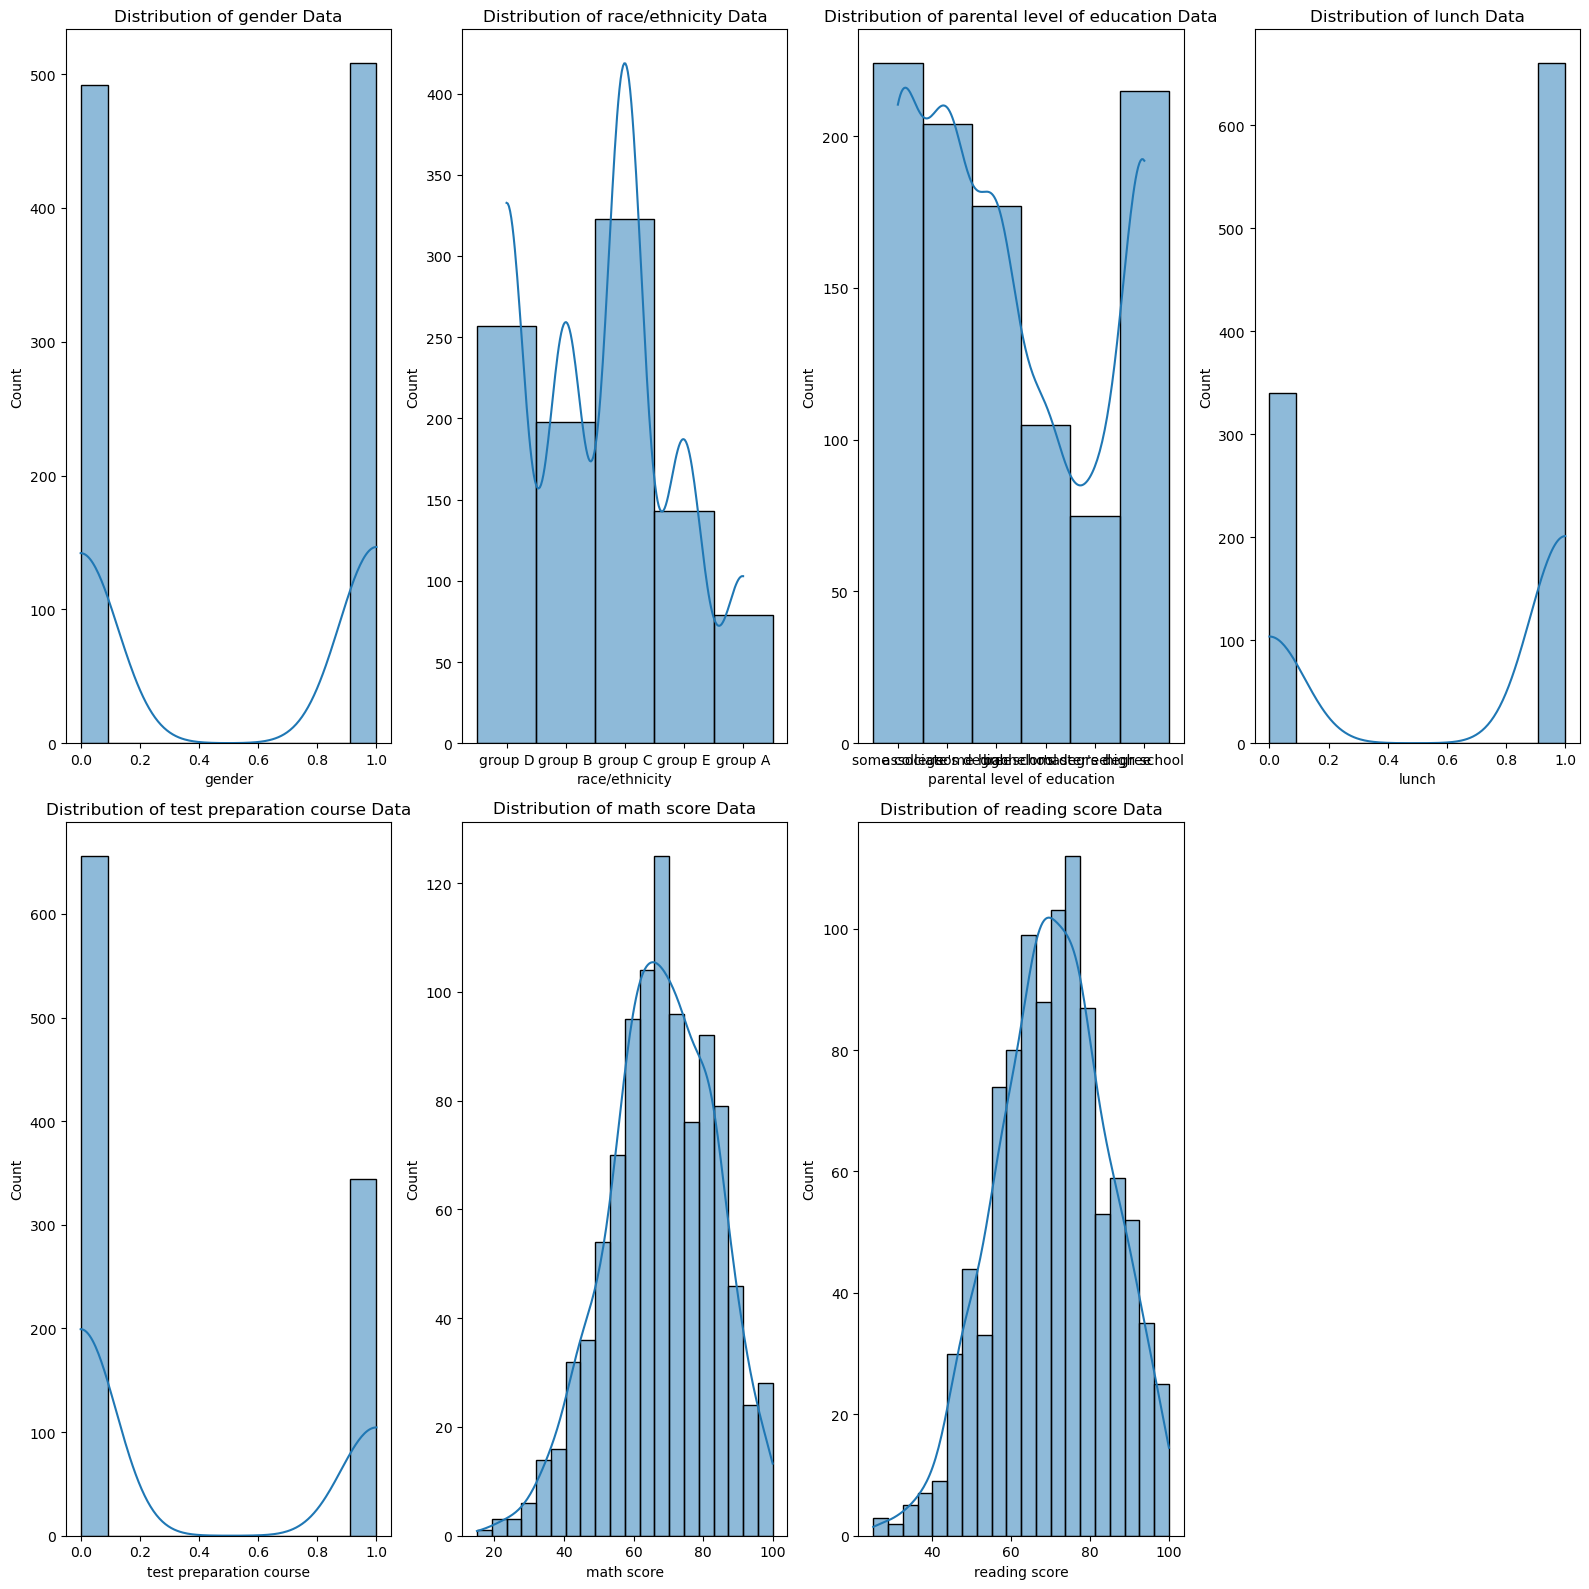

In [36]:
plt.figure(figsize = (16, 16))
num_plots = len(df.columns) - 1  # Exclude the last column
rows = (num_plots + 3) // 4  # Calculate the number of rows needed, add 3 to round up

for i, col in enumerate(df.columns[:-1]):
    plt.subplot(rows, 4, i+1)
    sns.histplot(df[col], kde= True)
    plt.title(f"Distribution of {col} Data")
    plt.tight_layout()
    plt.plot()

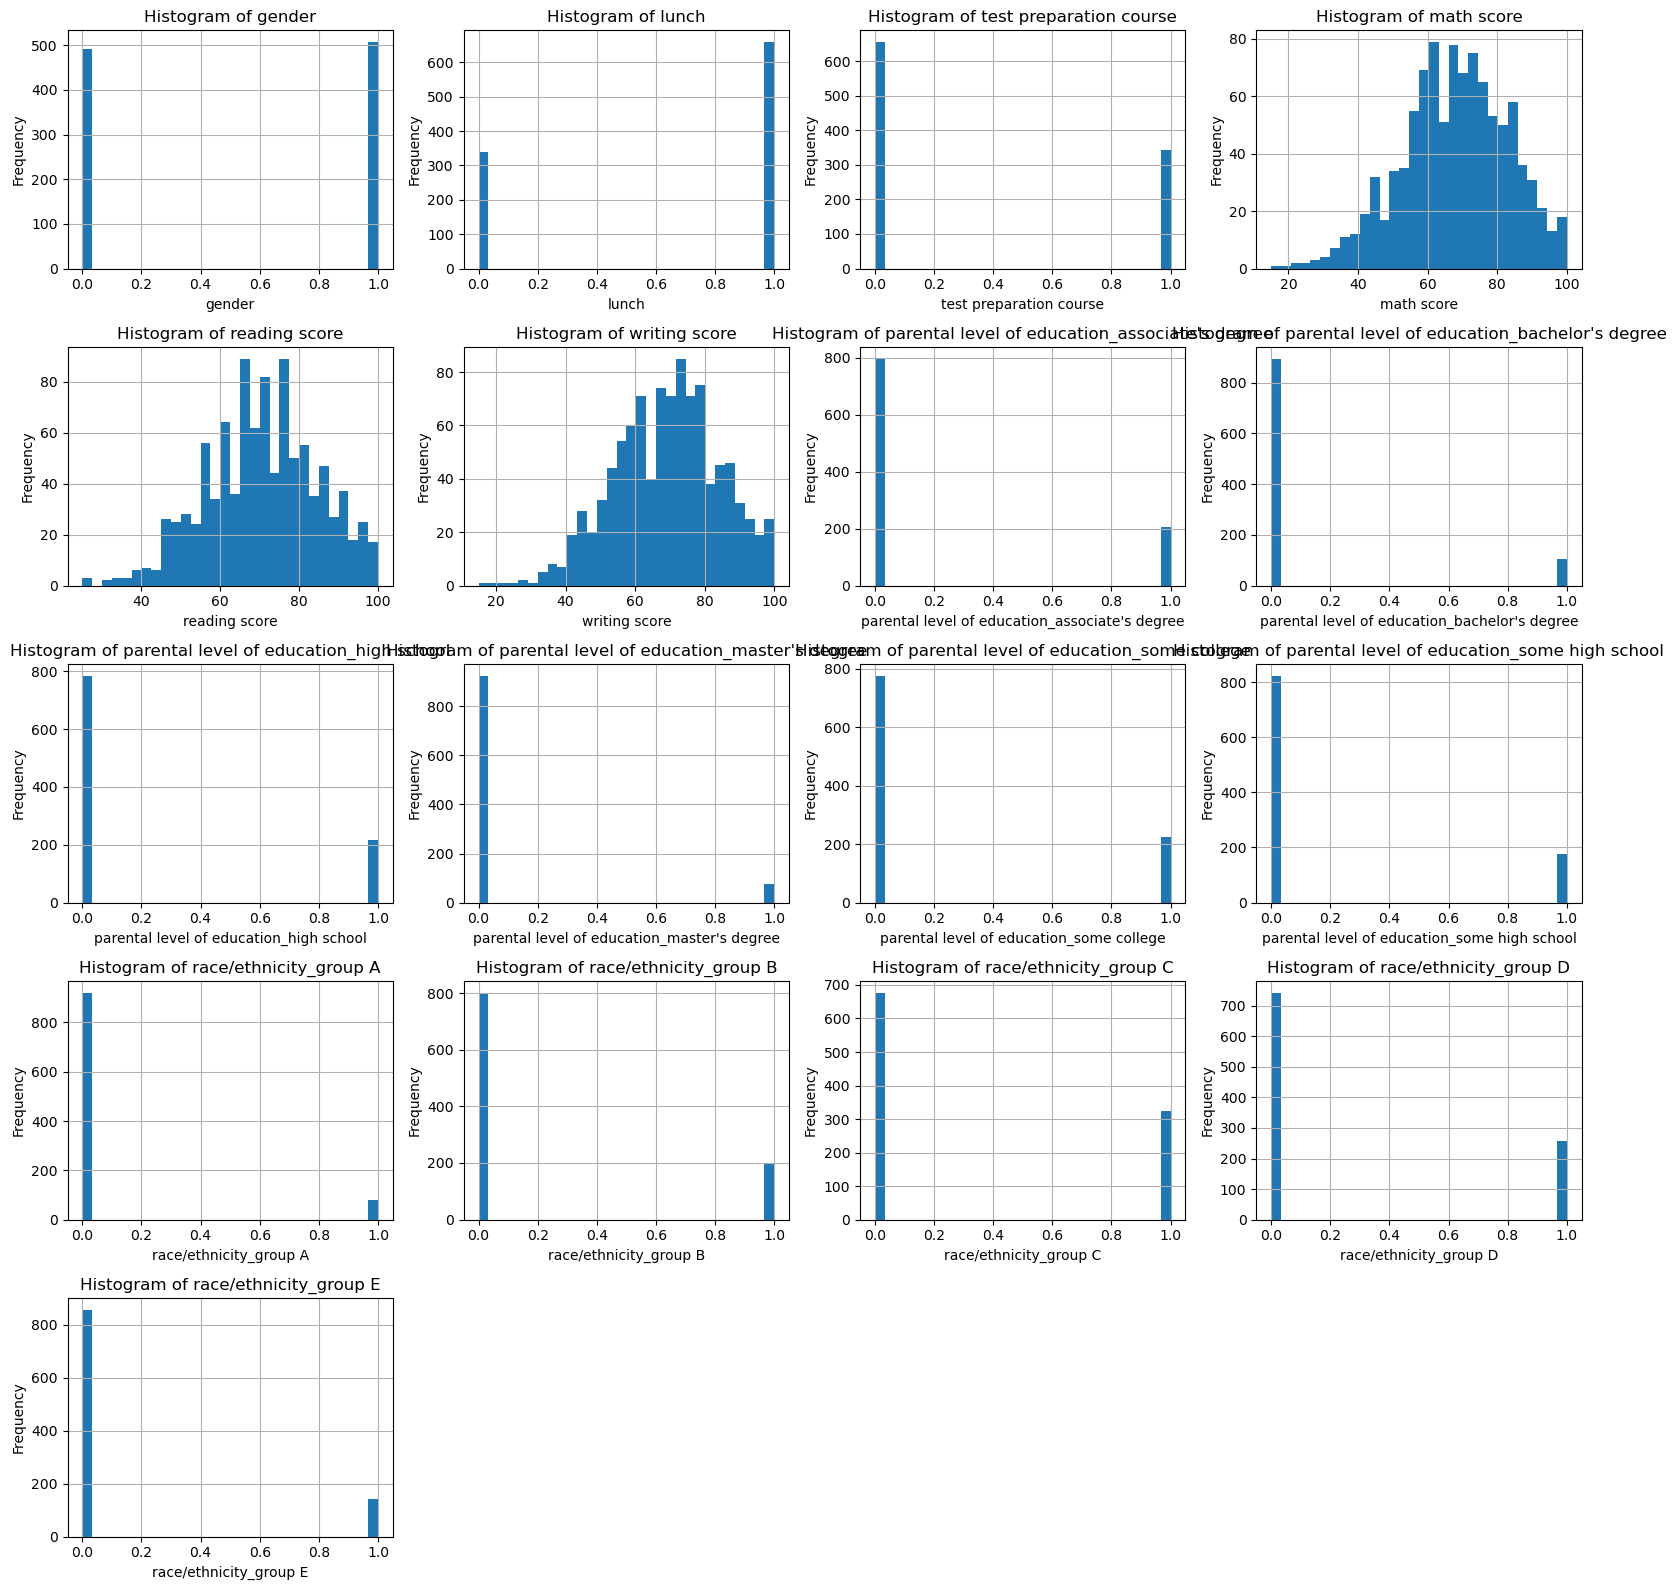

In [49]:

plt.figure(figsize = (16, 16))
num_plots = len(df.columns)  # Exclude the last column
rows = (num_plots + 3) // 4  # Calculate the number of rows needed, add 3 to round up

for i, column in enumerate(df.columns):
    plt.subplot(rows, 4, i+1)
    df[column].hist(bins=30)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.plot()

In [38]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,group D,some college,1,1,59,70,78
1,1,group D,associate's degree,1,0,96,93,87
2,0,group D,some college,0,0,57,76,77
3,1,group B,some college,0,0,70,70,63
4,0,group D,associate's degree,1,0,83,85,86
...,...,...,...,...,...,...,...,...
995,1,group C,some college,1,0,77,77,71
996,1,group C,some college,1,0,80,66,66
997,0,group A,high school,1,1,67,86,86
998,1,group E,high school,1,0,80,72,62


In [39]:
features_to_encode = ["parental level of education", "race/ethnicity"]

# Instantiate the encoder
encoder = OneHotEncoder(sparse=False)

# Fit and transform the data
encoded_data = encoder.fit_transform(df[features_to_encode])

# Create a DataFrame with the encoded data
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(features_to_encode))

# Reset index of your original DataFrame if it's not in default sequential order
df.reset_index(drop=True, inplace=True)

# Concatenate the original DataFrame with the new encoded DataFrame
df = pd.concat([df, encoded_df], axis=1)

# Optionally, drop the original columns
df.drop(features_to_encode, axis=1, inplace=True)

/Users/test/miniforge3/envs/machine-learning-env/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [40]:
X, y = df.drop("gender", axis=1), df["gender"]


X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

X_train_scaled, X_test_scaled = scaler.fit_transform(X_train), scaler.transform(X_test)

models = run_all_models(X_train_scaled, X_test_scaled, y_train_encoded, y_test_encoded)
models

LogisticRegression Accuracy: 0.94
SVC Accuracy: 0.88
DecisionTreeClassifier Accuracy: 0.805
RandomForestClassifier Accuracy: 0.87
KNeighborsClassifier Accuracy: 0.64
GradientBoostingClassifier Accuracy: 0.91
GaussianNB Accuracy: 0.66
7/7 [==============================] - 0s 2ms/step - loss: 0.3211 - accuracy: 0.8750
Sequential Model Accuracy: 0.875
Sequential Model Loss: 0.3210555613040924


,Model,Accuracy
0,LogisticRegression,0.940
1,SVC,0.880
2,DecisionTreeClassifier,0.805
3,RandomForestClassifier,0.870
4,KNeighborsClassifier,0.640
5,GradientBoostingClassifier,0.910
6,GaussianNB,0.660
7,Sequential,0.875


In [41]:
X, y = df.drop("gender", axis=1), df["gender"]


X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = MinMaxScaler()

X_train_scaled, X_test_scaled = scaler.fit_transform(X_train), scaler.transform(X_test)

models = run_all_models(X_train_scaled, X_test_scaled, y_train_encoded, y_test_encoded)
models

LogisticRegression Accuracy: 0.925
SVC Accuracy: 0.805
DecisionTreeClassifier Accuracy: 0.81
RandomForestClassifier Accuracy: 0.865
KNeighborsClassifier Accuracy: 0.62
GradientBoostingClassifier Accuracy: 0.91
GaussianNB Accuracy: 0.66
7/7 [==============================] - 0s 2ms/step - loss: 0.2420 - accuracy: 0.8800
Sequential Model Accuracy: 0.8799999952316284
Sequential Model Loss: 0.2420046627521515


,Model,Accuracy
0,LogisticRegression,0.925
1,SVC,0.805
2,DecisionTreeClassifier,0.810
3,RandomForestClassifier,0.865
4,KNeighborsClassifier,0.620
5,GradientBoostingClassifier,0.910
6,GaussianNB,0.660
7,Sequential,0.880


In [42]:
entropy_df = calculate_entropy(df)
entropy_df

,gender,lunch,test preparation course,math score,reading score,writing score,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E
entropy,0.999815,0.924819,0.928595,5.89578,5.775214,5.857864,0.729856,0.484648,0.750932,0.384312,0.767404,0.67347,0.398646,0.71791,0.907614,0.822186,0.592042


In [43]:
len(df.columns)

17

In [44]:
automate_pca(16, X_train_scaled, X_test_scaled, y_train_encoded, y_test_encoded)


LogisticRegression Accuracy: 0.925
SVC Accuracy: 0.755
DecisionTreeClassifier Accuracy: 0.85
RandomForestClassifier Accuracy: 0.905
KNeighborsClassifier Accuracy: 0.62
GradientBoostingClassifier Accuracy: 0.905
GaussianNB Accuracy: 0.935
7/7 [==============================] - 0s 928us/step - loss: 0.2289 - accuracy: 0.9100
Sequential Model Accuracy: 0.9100000262260437
Sequential Model Loss: 0.22892850637435913
                        Model  Accuracy
0          LogisticRegression     0.925
1                         SVC     0.755
2      DecisionTreeClassifier     0.850
3      RandomForestClassifier     0.905
4        KNeighborsClassifier     0.620
5  GradientBoostingClassifier     0.905
6                  GaussianNB     0.935
7                  Sequential     0.910


In [45]:
automate_pca(15, X_train_scaled, X_test_scaled, y_train_encoded, y_test_encoded)

LogisticRegression Accuracy: 0.925
SVC Accuracy: 0.755
DecisionTreeClassifier Accuracy: 0.83
RandomForestClassifier Accuracy: 0.91
KNeighborsClassifier Accuracy: 0.62
GradientBoostingClassifier Accuracy: 0.905
GaussianNB Accuracy: 0.935
7/7 [==============================] - 0s 888us/step - loss: 0.2351 - accuracy: 0.8800
Sequential Model Accuracy: 0.8799999952316284
Sequential Model Loss: 0.23509201407432556
                        Model  Accuracy
0          LogisticRegression     0.925
1                         SVC     0.755
2      DecisionTreeClassifier     0.830
3      RandomForestClassifier     0.910
4        KNeighborsClassifier     0.620
5  GradientBoostingClassifier     0.905
6                  GaussianNB     0.935
7                  Sequential     0.880


In [46]:
automate_pca(13, X_train_scaled, X_test_scaled, y_train_encoded, y_test_encoded)

LogisticRegression Accuracy: 0.91
SVC Accuracy: 0.76
DecisionTreeClassifier Accuracy: 0.83
RandomForestClassifier Accuracy: 0.875
KNeighborsClassifier Accuracy: 0.615
GradientBoostingClassifier Accuracy: 0.89
GaussianNB Accuracy: 0.92
7/7 [==============================] - 0s 789us/step - loss: 0.2535 - accuracy: 0.8800
Sequential Model Accuracy: 0.8799999952316284
Sequential Model Loss: 0.25350722670555115
                        Model  Accuracy
0          LogisticRegression     0.910
1                         SVC     0.760
2      DecisionTreeClassifier     0.830
3      RandomForestClassifier     0.875
4        KNeighborsClassifier     0.615
5  GradientBoostingClassifier     0.890
6                  GaussianNB     0.920
7                  Sequential     0.880


In [47]:
automate_pca(13, X_train_scaled, X_test_scaled, y_train_encoded, y_test_encoded)

LogisticRegression Accuracy: 0.91
SVC Accuracy: 0.76
DecisionTreeClassifier Accuracy: 0.83
RandomForestClassifier Accuracy: 0.875
KNeighborsClassifier Accuracy: 0.615
GradientBoostingClassifier Accuracy: 0.89
GaussianNB Accuracy: 0.92
7/7 [==============================] - 0s 983us/step - loss: 0.2421 - accuracy: 0.9000
Sequential Model Accuracy: 0.8999999761581421
Sequential Model Loss: 0.24214774370193481
                        Model  Accuracy
0          LogisticRegression     0.910
1                         SVC     0.760
2      DecisionTreeClassifier     0.830
3      RandomForestClassifier     0.875
4        KNeighborsClassifier     0.615
5  GradientBoostingClassifier     0.890
6                  GaussianNB     0.920
7                  Sequential     0.900


In [48]:
automate_pca(13, X_train_scaled, X_test_scaled, y_train_encoded, y_test_encoded)

LogisticRegression Accuracy: 0.91
SVC Accuracy: 0.76
DecisionTreeClassifier Accuracy: 0.83
RandomForestClassifier Accuracy: 0.875
KNeighborsClassifier Accuracy: 0.615
GradientBoostingClassifier Accuracy: 0.89
GaussianNB Accuracy: 0.92
7/7 [==============================] - 0s 936us/step - loss: 0.2746 - accuracy: 0.8650
Sequential Model Accuracy: 0.8650000095367432
Sequential Model Loss: 0.27456599473953247
                        Model  Accuracy
0          LogisticRegression     0.910
1                         SVC     0.760
2      DecisionTreeClassifier     0.830
3      RandomForestClassifier     0.875
4        KNeighborsClassifier     0.615
5  GradientBoostingClassifier     0.890
6                  GaussianNB     0.920
7                  Sequential     0.865
